In [1]:
DRIVEPATH = ("/Users/rileydenn/Library/CloudStorage/GoogleDrive-rileydenn@gmail.com/"
             ".shortcut-targets-by-id/1FsOPywSgK_wZmrVrSTBVi4q8G3Mg_yMJ/Team-Fermata-Energy")
PATH = DRIVEPATH + "/[EXTERNAL] breakthrough_tech_ai_f24/data"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
md_full = pd.read_csv(PATH + "/metadata.csv")

FOLDER_PATH = PATH + "/building_data"

existing_ids = set()

for folder_name in os.listdir(FOLDER_PATH):
    try:
        existing_ids.add(int(folder_name))
    except ValueError:
        continue

md = md_full[md_full['bldg_id'].isin(existing_ids)]

In [4]:
md_full.shape

(346185, 15)

In [5]:
md.shape

(32000, 15)

In [6]:
md.head()

,bldg_id,in.building_america_climate_zone,in.iso_rto_region,in.state,in.cluster_id,in.cluster_name,in.heating_fuel,in.interior_lighting_generation,in.floor_area_category,in.service_water_heating_fuel,in.comstock_building_type,in.comstock_building_type_group,in.vintage,in.sqft,in.nhgis_county_gisjoin
410,48709,Hot-Dry,NaN,CA,109.0,CA Climate Zone 9,Electricity,gen4_led,200001_500000,Electricity,LargeOffice,Office,1960 to 1969,350000.0,G0600370
494,58658,Cold,NaN,CO,36.0,the Cheyenne-Denver-Colorado Springs Area,NaturalGas,gen2_t8_halogen,100001_200000,Electricity,LargeOffice,Office,Before 1946,150000.0,G0800310
905,105885,Hot-Humid,NaN,HI,42.0,Hawaii,NaturalGas,gen1_t12_incandescent,500001_1mil,NaturalGas,LargeHotel,Lodging,1970 to 1979,750000.0,G1500030
1036,119634,Cold,PJM,IL,82.0,the Chicago to Green Bay and Madison Area,NaturalGas,gen2_t8_halogen,500001_1mil,NaturalGas,LargeHotel,Lodging,1990 to 1999,750000.0,G1700310
1757,205046,Mixed-Humid,NYISO,NY,54.0,the Greater New York City Area,DistrictHeating,gen2_t8_halogen,200001_500000,DistrictHeating,LargeOffice,Office,Before 1946,350000.0,G3600610


In [7]:
md.columns

Index(['bldg_id', 'in.building_america_climate_zone', 'in.iso_rto_region',
       'in.state', 'in.cluster_id', 'in.cluster_name', 'in.heating_fuel',
       'in.interior_lighting_generation', 'in.floor_area_category',
       'in.service_water_heating_fuel', 'in.comstock_building_type',
       'in.comstock_building_type_group', 'in.vintage', 'in.sqft',
       'in.nhgis_county_gisjoin'],
      dtype='object')

In [8]:
md['in.building_america_climate_zone'].unique()

array(['Hot-Dry', 'Cold', 'Hot-Humid', 'Mixed-Humid', 'Very Cold',
       'Subarctic', 'Mixed-Dry', 'Marine'], dtype=object)

In [9]:
counts = md['in.building_america_climate_zone'].value_counts()
print(counts)

in.building_america_climate_zone
Mixed-Humid    10656
Cold            9578
Hot-Humid       6791
Hot-Dry         3390
Marine          1077
Mixed-Dry        282
Very Cold        222
Subarctic          4
Name: count, dtype: int64


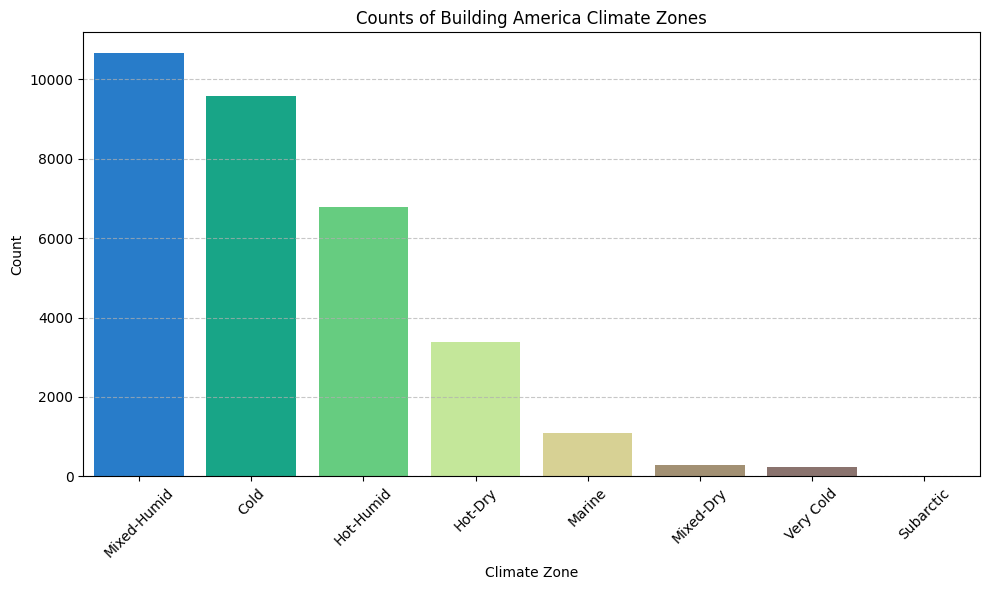

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values, hue=counts.index, palette='terrain')
plt.title('Counts of Building America Climate Zones')
plt.xlabel('Climate Zone')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [11]:
# Merge 'Subarctic' with 'Very Cold'
md['in.building_america_climate_zone'] = md['in.building_america_climate_zone'].replace('Subarctic', 'Very Cold')

/var/folders/r6/twj1md916gd57zlpnjwmw4p40000gn/T/ipykernel_2102/659060337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  md['in.building_america_climate_zone'] = md['in.building_america_climate_zone'].replace('Subarctic', 'Very Cold')


In [12]:
md['in.building_america_climate_zone'].value_counts()

in.building_america_climate_zone
Mixed-Humid    10656
Cold            9578
Hot-Humid       6791
Hot-Dry         3390
Marine          1077
Mixed-Dry        282
Very Cold        226
Name: count, dtype: int64

In [13]:
sample_size = 15

# Sample n buildings from each climate zone
sampled_buildings = md.groupby('in.building_america_climate_zone').apply(lambda x: x.sample(n=min(sample_size, len(x)), random_state=42))

# Reset index after groupby operation
sampled_buildings = sampled_buildings.reset_index(drop=True)

# Get the list of building IDs
building_ids = sampled_buildings['bldg_id'].tolist()

print(f"Selected building IDs for analysis: {building_ids[:10]}...")


Selected building IDs for analysis: [267606, 172301, 113127, 257605, 117320, 246198, 208599, 239548, 325381, 221424]...


/var/folders/r6/twj1md916gd57zlpnjwmw4p40000gn/T/ipykernel_2102/108344771.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_buildings = md.groupby('in.building_america_climate_zone').apply(lambda x: x.sample(n=min(sample_size, len(x)), random_state=42))


In [14]:
sampled_buildings

,bldg_id,in.building_america_climate_zone,in.iso_rto_region,in.state,in.cluster_id,in.cluster_name,in.heating_fuel,in.interior_lighting_generation,in.floor_area_category,in.service_water_heating_fuel,in.comstock_building_type,in.comstock_building_type_group,in.vintage,in.sqft,in.nhgis_county_gisjoin
0,267606,Cold,PJM,PA,39.0,the Washington DC to Philadelphia Area,NaturalGas,gen2_t8_halogen,10001_25000,NaturalGas,FullServiceRestaurant,Food Service,1970 to 1979,17500.0,G4200690
1,172301,Cold,MISO,MN,21.0,Greater Minneapolis-St Paul,NaturalGas,gen1_t12_incandescent,1001_5000,Electricity,SmallOffice,Office,1970 to 1979,3000.0,G2700250
2,113127,Cold,PJM,IL,82.0,the Chicago to Green Bay and Madison Area,NaturalGas,gen4_led,10001_25000,NaturalGas,MediumOffice,Office,1946 to 1959,17500.0,G1700310
3,257605,Cold,NaN,OR,31.0,Rural Mountain West,Electricity,gen4_led,10001_25000,Electricity,SecondarySchool,Education,1970 to 1979,17500.0,G4100590
4,117320,Cold,PJM,IL,82.0,the Chicago to Green Bay and Madison Area,NaturalGas,gen2_t8_halogen,5001_10000,NaturalGas,RetailStandalone,Mercantile,1980 to 1989,7500.0,G1700930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,144640,Very Cold,NEISO,ME,59.0,Northern New England,Electricity,gen2_t8_halogen,5001_10000,Electricity,SmallHotel,Lodging,2000 to 2012,7500.0,G2300030
101,5441,Very Cold,NaN,AK,37.0,Alaska,NaturalGas,gen3_t5_cfl,10001_25000,Electricity,RetailStripmall,Mercantile,2000 to 2012,17500.0,G0200200
102,236570,Very Cold,MISO,ND,72.0,Rural Midwest North,NaturalGas,gen4_led,50001_100000,NaturalGas,RetailStripmall,Mercantile,1946 to 1959,75000.0,G3800930
103,5545,Very Cold,NaN,AK,37.0,Alaska,NaturalGas,gen4_led,10001_25000,Electricity,RetailStandalone,Mercantile,1946 to 1959,17500.0,G0200200


In [15]:
ex_bldg_id = building_ids[0]

ex_bldg_load = pd.read_csv(f'{PATH}/building_data/{ex_bldg_id}/load.csv')
ex_bldg_weather = pd.read_csv(f'{PATH}/building_data/{ex_bldg_id}/weather.csv')

In [16]:
ex_bldg_load.head(10)

,timestamp,out.electricity.total.energy_consumption
0,2018-01-01 00:15:00,3.773645
1,2018-01-01 00:30:00,3.625700
2,2018-01-01 00:45:00,3.623544
3,2018-01-01 01:00:00,3.518034
4,2018-01-01 01:15:00,3.316761
5,2018-01-01 01:30:00,3.232110
6,2018-01-01 01:45:00,3.289115
7,2018-01-01 02:00:00,3.239040
8,2018-01-01 02:15:00,3.287343
9,2018-01-01 02:30:00,3.227642


In [17]:
ex_bldg_load.shape

(35040, 2)

In [18]:
ex_bldg_load.columns

Index(['timestamp', 'out.electricity.total.energy_consumption'], dtype='object')

In [19]:
ex_bldg_weather.head(10)

,date_time,Dry Bulb Temperature [°C],Relative Humidity [%]
0,2018-01-01 01:00:00,-16.1,62.220751
1,2018-01-01 02:00:00,-16.4,64.011275
2,2018-01-01 03:00:00,-16.7,69.057711
3,2018-01-01 04:00:00,-16.7,69.057710
4,2018-01-01 05:00:00,-16.7,69.057711
5,2018-01-01 06:00:00,-17.8,76.570983
6,2018-01-01 07:00:00,-17.8,72.960846
7,2018-01-01 08:00:00,-17.8,72.960848
8,2018-01-01 09:00:00,-16.7,73.159710
9,2018-01-01 10:00:00,-14.4,62.613393


In [20]:
ex_bldg_weather.shape

(8760, 3)

In [21]:
ex_bldg_weather.columns

Index(['date_time', 'Dry Bulb Temperature [°C]', 'Relative Humidity [%]'], dtype='object')

In [22]:
# Initialize an empty list to hold DataFrames for all buildings
all_buildings_data = []

# Step 2: Load, aggregate, and merge data for each sampled building
for _, row in sampled_buildings.iterrows():
    building_id = row['bldg_id']
    climate_zone = row['in.building_america_climate_zone']

    # Load building's load and weather data
    load_data = pd.read_csv(f'{PATH}/building_data/{building_id}/load.csv')
    weather_data = pd.read_csv(f'{PATH}/building_data/{building_id}/weather.csv')

    # Convert timestamps to datetime for merging and aggregation
    load_data['timestamp'] = pd.to_datetime(load_data['timestamp'])
    weather_data['date_time'] = pd.to_datetime(weather_data['date_time'])

    # Aggregate the load data to hourly by summing up the 15-minute intervals for each hour
    load_data_hourly = load_data.resample('h', on='timestamp').sum().reset_index()

    # Merge hourly load data with weather data on timestamp
    building_data = pd.merge(
        load_data_hourly,
        weather_data,
        left_on='timestamp',
        right_on='date_time',
        how='inner'
    )

    # Drop the date_time column since its redundant // the same values as timestamp
    building_data = building_data.drop(columns=['date_time'])

    # Step 3: Assign climate zone and building_id
    building_data['climate_zone'] = climate_zone
    building_data['bldg_id'] = building_id

    # Append to the list
    all_buildings_data.append(building_data)

# Step 4: Combine data for all sampled buildings
combined_df = pd.concat(all_buildings_data, ignore_index=True)

# Drop rows where the timestamp date is '2019-01-01' or '2018-01-01' to remove edge cases
combined_df = combined_df.loc[~combined_df['timestamp'].dt.date.isin([pd.to_datetime('2019-01-01').date(), pd.to_datetime('2018-01-01').date()])]

# Rename columns by reassigning, not using inplace to avoid warnings
combined_df = combined_df.rename(columns={
    'out.electricity.total.energy_consumption': 'energy_consumption',
    'Dry Bulb Temperature [°C]': 'Temp (C)'})

In [23]:
combined_df

,timestamp,energy_consumption,Temp (C),Relative Humidity [%],climate_zone,bldg_id
23,2018-01-02 00:00:00,18.549994,-12.80,66.635022,Cold,267606
24,2018-01-02 01:00:00,13.789186,-13.30,65.905558,Cold,267606
25,2018-01-02 02:00:00,13.451071,-13.05,64.441853,Cold,267606
26,2018-01-02 03:00:00,13.663148,-13.30,69.732422,Cold,267606
27,2018-01-02 04:00:00,14.166928,-13.30,73.075888,Cold,267606
...,...,...,...,...,...,...
919794,2018-12-31 19:00:00,24.312429,1.70,95.781702,Very Cold,5596
919795,2018-12-31 20:00:00,27.476001,1.70,95.781700,Very Cold,5596
919796,2018-12-31 21:00:00,18.623190,2.20,96.487758,Very Cold,5596
919797,2018-12-31 22:00:00,10.501468,2.80,88.553335,Very Cold,5596


In [24]:
combined_df['climate_zone'].value_counts()

climate_zone
Cold           131040
Hot-Dry        131040
Hot-Humid      131040
Marine         131040
Mixed-Dry      131040
Mixed-Humid    131040
Very Cold      131040
Name: count, dtype: int64

In [25]:
# Get total daily load for each building
daily_load = combined_df.groupby(['bldg_id', 'climate_zone', combined_df['timestamp'].dt.date]).agg({'energy_consumption': 'sum', 'Temp (C)': 'mean'}).reset_index()
daily_load.rename(columns={'timestamp': 'date', 'Temp (C)': 'avg_temp (C)'}, inplace=True)
daily_load

,bldg_id,climate_zone,date,energy_consumption,avg_temp (C)
0,363,Mixed-Humid,2018-01-02,5482.090613,-7.670833
1,363,Mixed-Humid,2018-01-03,4672.969478,-3.762500
2,363,Mixed-Humid,2018-01-04,4951.674226,-5.995833
3,363,Mixed-Humid,2018-01-05,4847.791854,-5.304167
4,363,Mixed-Humid,2018-01-06,4459.715043,-3.679167
...,...,...,...,...,...
38215,325381,Cold,2018-12-27,82.176234,-3.193958
38216,325381,Cold,2018-12-28,83.513295,-4.587500
38217,325381,Cold,2018-12-29,88.054706,-5.741319
38218,325381,Cold,2018-12-30,81.755000,-3.292361


In [26]:
# For each day, and each climate zone, get the average energy consumption per building in that particular climate zone

zone_avg_daily_load = daily_load.groupby(['climate_zone', 'date']).agg({'energy_consumption': 'mean'}).reset_index()
zone_avg_daily_load.rename(columns={'energy_consumption': 'avg_daily_load_per_building'}, inplace=True)
zone_avg_daily_load[zone_avg_daily_load['climate_zone']=='Hot-Humid']

,climate_zone,date,avg_daily_load_per_building
728,Hot-Humid,2018-01-02,1454.197590
729,Hot-Humid,2018-01-03,1356.484944
730,Hot-Humid,2018-01-04,1240.875566
731,Hot-Humid,2018-01-05,1142.614088
732,Hot-Humid,2018-01-06,900.708141
...,...,...,...
1087,Hot-Humid,2018-12-27,1066.707077
1088,Hot-Humid,2018-12-28,1051.715142
1089,Hot-Humid,2018-12-29,859.888429
1090,Hot-Humid,2018-12-30,881.984380


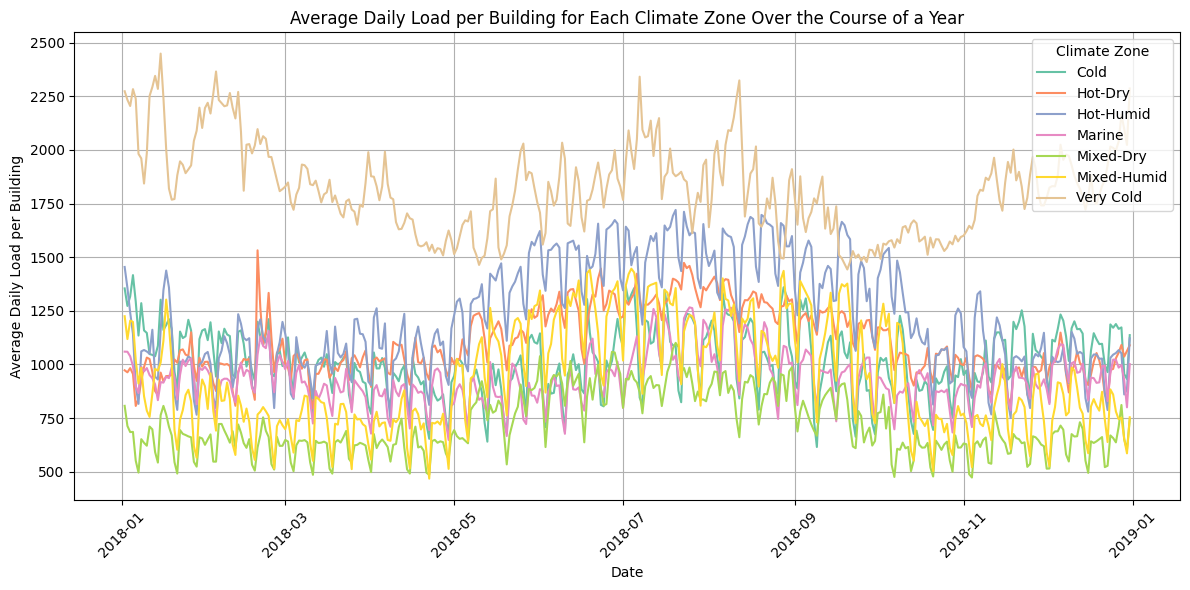

In [27]:
# Visualize average energy comsumption per building per day for each climate zone
plt.figure(figsize=(12, 6))
sns.lineplot(data=zone_avg_daily_load, x='date', y='avg_daily_load_per_building', hue='climate_zone', palette='Set2')
plt.title('Average Daily Load per Building for Each Climate Zone Over the Course of a Year')
plt.xlabel('Date')
plt.ylabel('Average Daily Load per Building')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Climate Zone')
plt.tight_layout()
plt.show()

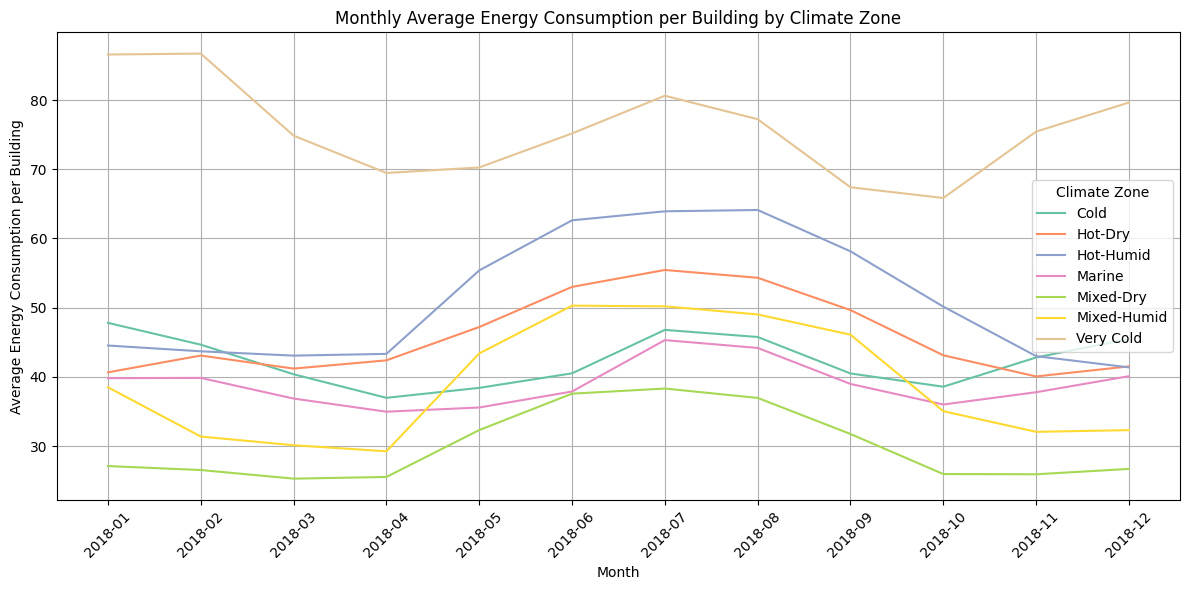

In [28]:
# Convert timestamp to month and year
combined_df['month'] = combined_df['timestamp'].dt.to_period('M').astype(str)

# Calculate the monthly average energy consumption per building
monthly_avg_per_building = combined_df.groupby(['month', 'climate_zone', 'bldg_id'])['energy_consumption'].mean().reset_index()

# Calculate the monthly average energy consumption per climate zone
monthly_avg_by_zone = monthly_avg_per_building.groupby(['month', 'climate_zone'])['energy_consumption'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg_by_zone, x='month', y='energy_consumption', hue='climate_zone', palette='Set2')
plt.title('Monthly Average Energy Consumption per Building by Climate Zone')
plt.xlabel('Month')
plt.ylabel('Average Energy Consumption per Building')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Climate Zone')
plt.tight_layout()
plt.show()


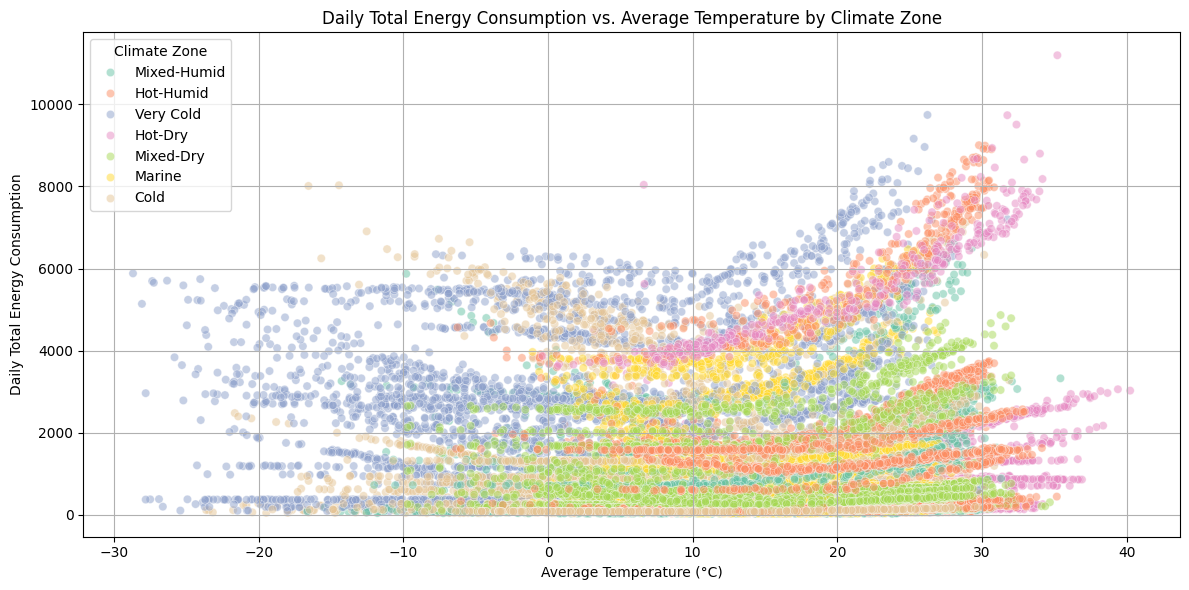

In [29]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=daily_load, x='avg_temp (C)', y='energy_consumption', hue='climate_zone', palette='Set2', alpha=0.5)
plt.title('Daily Total Energy Consumption vs. Average Temperature by Climate Zone')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Daily Total Energy Consumption')
plt.grid(True)
plt.legend(title='Climate Zone')
plt.tight_layout()
plt.show()



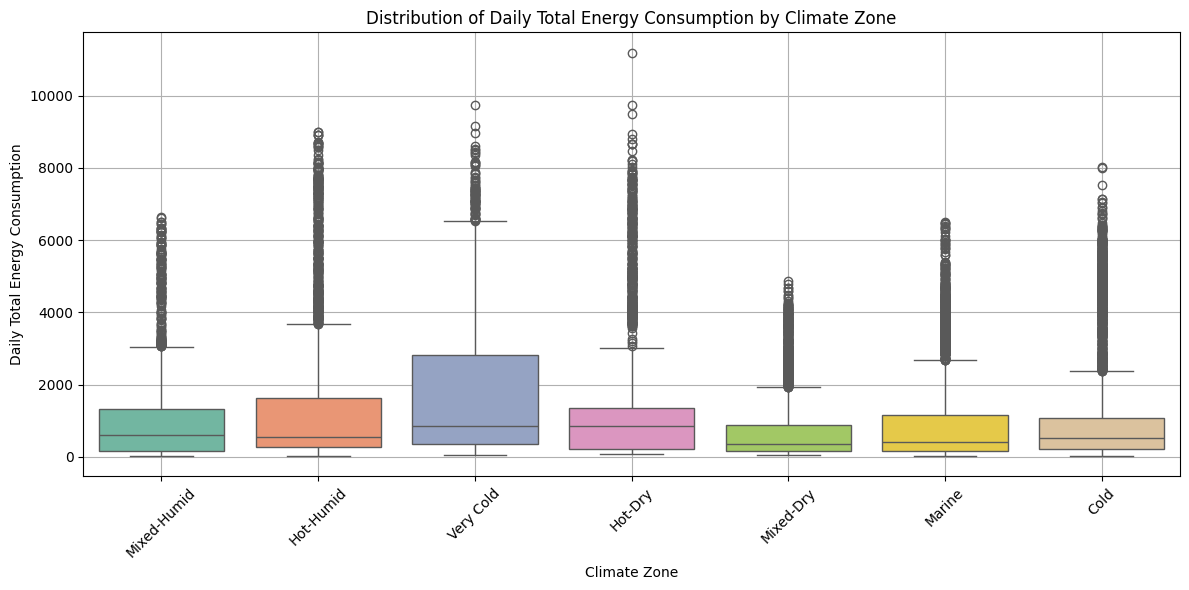

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=daily_load, x='climate_zone', y='energy_consumption', hue='climate_zone', palette='Set2')
plt.title('Distribution of Daily Total Energy Consumption by Climate Zone')
plt.xlabel('Climate Zone')
plt.ylabel('Daily Total Energy Consumption')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


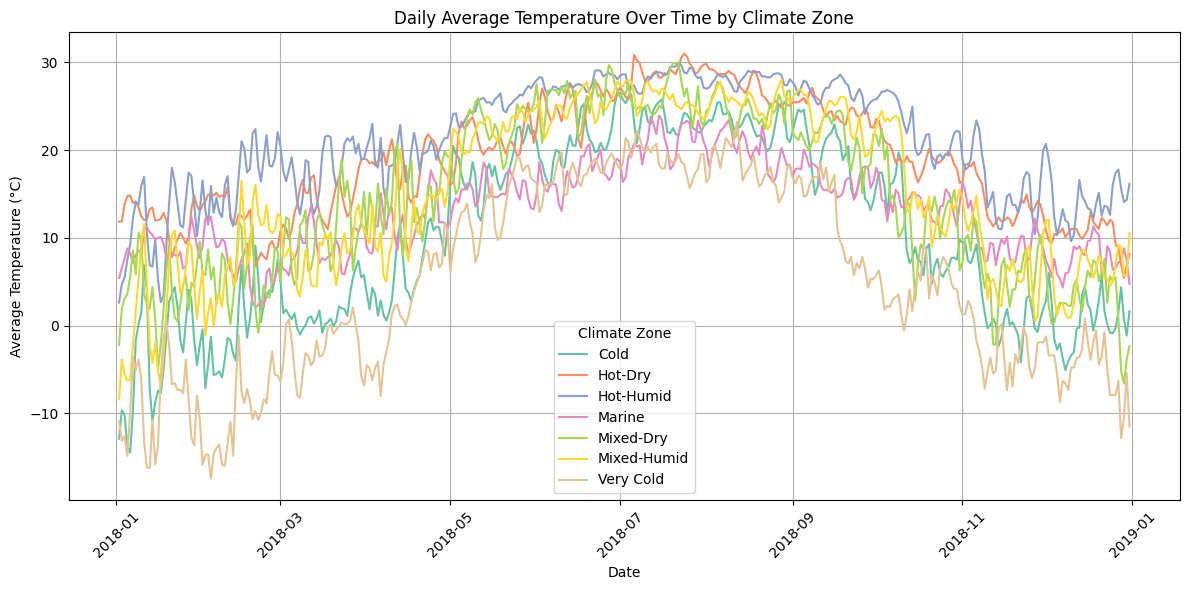

In [31]:
# Step 1: Aggregate daily average temperature per climate zone
daily_temp_avg = daily_load.groupby(['date', 'climate_zone'])['avg_temp (C)'].mean().reset_index()

# Step 2: Plot the aggregated data
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_temp_avg, x='date', y='avg_temp (C)', hue='climate_zone', palette='Set2')
plt.title('Daily Average Temperature Over Time by Climate Zone')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.legend(title='Climate Zone')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


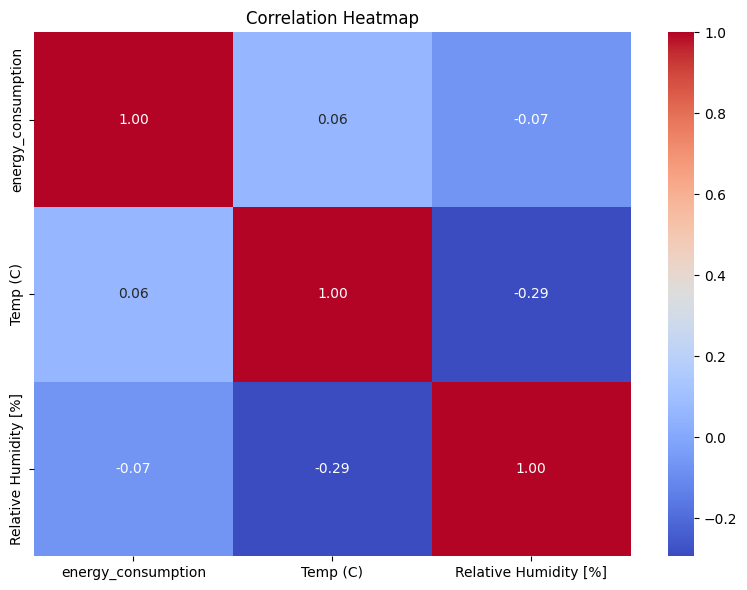

In [32]:
# Compute the correlation matrix
correlation_matrix = combined_df[['energy_consumption', 'Temp (C)', 'Relative Humidity [%]']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()
